In [1]:
import torch

from pathlib import Path
import librosa
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

from network import NAF
from sound_loader import sound_samples
import utils.irutilities as irutil

path = Path('mesh_rir/S32-M441_npy/')
print('Loading IRs ...')
posMic, posSrc, ir = irutil.loadIR(path)

#print(posSrc_above, posSrc_above.shape)

samplerate = 48000

print(ir.shape)

sorted_indices = np.lexsort((posSrc[:, 1], posSrc[:, 0]))
sorted_posSrc = posSrc[sorted_indices]



print("Sorted Array:")
print(sorted_posSrc, sorted_posSrc.shape)


Loading IRs ...
(32, 441, 32768)
Sorted Array:
[[-1.   -0.95 -0.1 ]
 [-1.   -0.7   0.1 ]
 [-1.   -0.45 -0.1 ]
 [-1.   -0.2   0.1 ]
 [-1.    0.05 -0.1 ]
 [-1.    0.3   0.1 ]
 [-1.    0.55 -0.1 ]
 [-1.    0.8   0.1 ]
 [-0.95  1.   -0.1 ]
 [-0.8  -1.    0.1 ]
 [-0.7   1.    0.1 ]
 [-0.55 -1.   -0.1 ]
 [-0.45  1.   -0.1 ]
 [-0.3  -1.    0.1 ]
 [-0.2   1.    0.1 ]
 [-0.05 -1.   -0.1 ]
 [ 0.05  1.   -0.1 ]
 [ 0.2  -1.    0.1 ]
 [ 0.3   1.    0.1 ]
 [ 0.45 -1.   -0.1 ]
 [ 0.55  1.   -0.1 ]
 [ 0.7  -1.    0.1 ]
 [ 0.8   1.    0.1 ]
 [ 0.95 -1.   -0.1 ]
 [ 1.   -0.8   0.1 ]
 [ 1.   -0.55 -0.1 ]
 [ 1.   -0.3   0.1 ]
 [ 1.   -0.05 -0.1 ]
 [ 1.    0.2   0.1 ]
 [ 1.    0.45 -0.1 ]
 [ 1.    0.7   0.1 ]
 [ 1.    0.95 -0.1 ]] (32, 3)


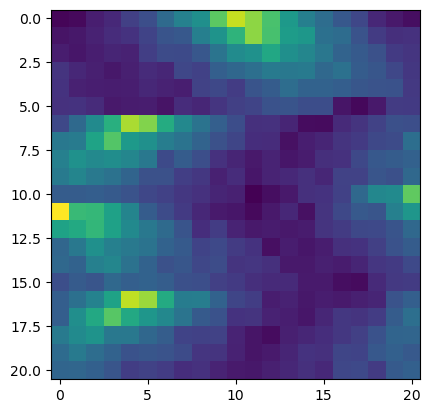

In [2]:
ir_layer = ir[3,:,:]
loudness = np.zeros(ir_layer.shape[0])

for i in range(ir_layer.shape[0]):
    sample = ir_layer[i,:]
    peak = np.max(sample)
    loudness[i] = peak

loudness = loudness.reshape(21,21)

plt.figure()
plt.imshow(loudness)
plt.show()

[[-0.5  -0.5   0.  ]
 [-0.5  -0.45  0.  ]
 [-0.5  -0.4   0.  ]
 ...
 [ 0.5   0.4   0.  ]
 [ 0.5   0.45  0.  ]
 [ 0.5   0.5   0.  ]]
(32, 441, 32768)


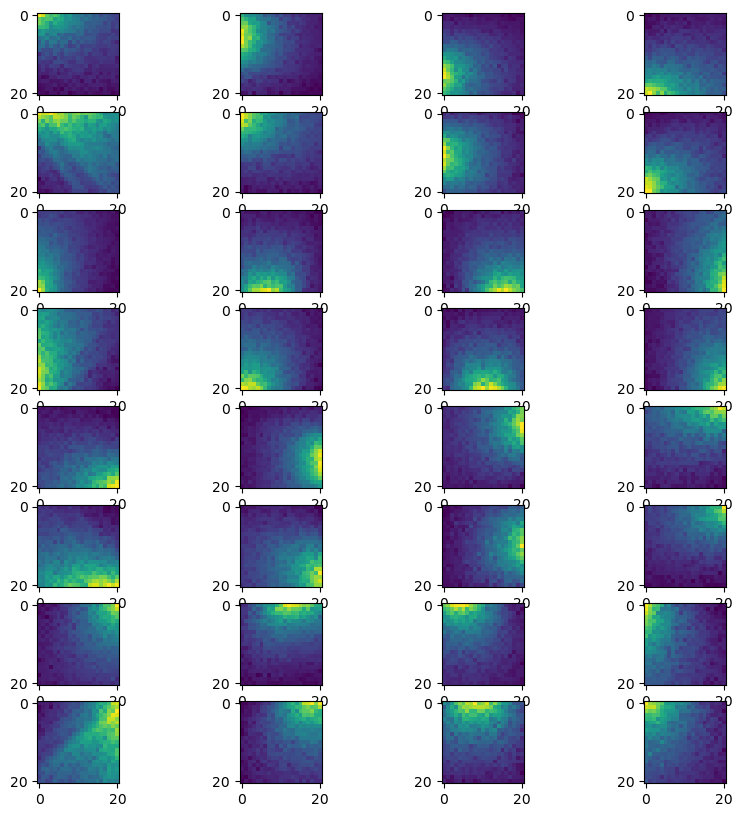

In [3]:
sorted_mics_indices =  np.lexsort((posMic[:, 1], posMic[:, 0]))
posMic2 = posMic[sorted_mics_indices]
print(posMic2)
sorted_ir = ir[:,sorted_mics_indices,:]
print(sorted_ir.shape)

new = [7,5,3,1,6,4,2,0,9,13,15,21,11,15,19,23,24,26,28,30,25,27,29,31,22,18,14,10,20,16,12,8]
posSrc = sorted_posSrc[new]

plt.figure(figsize=(10,10))
for j in range(sorted_ir.shape[0]):
    #print(j)
    im = plt.subplot(8,4,j+1)
    ir_layer = sorted_ir[j,:,:]
    loudness = np.zeros(ir_layer.shape[0])

    for i in range(ir_layer.shape[0]):
        sample = ir_layer[i,:]
        peak = np.max(sample)
        loudness[i] = peak

    loudness = loudness.reshape(21,21)
    im.imshow(loudness)

plt.show()

In [ ]:
# Extract plane
z = 0.0
posMic_z, ir_z = irutil.extract_plane(posMic, ir, z)
posMicX = np.unique(posMic_z[:, 0].round(4))
posMicY = np.unique(posMic_z[:, 1].round(4))
numXY = (posMicX.shape[0], posMicX.shape[0])
posMicXY, irXY, id = irutil.sortIR(posMic_z, ir_z, numXY, posMicX, posMicY)
print(posMicXY.shape, irXY.shape)
print(posMicXY)
print(id.shape, id)

In [ ]:
to_keep = []
indices = []

index = 0
print(index)
print(sorted_data[index])
ir_layer = irXY[index,:,:,:].reshape(441,-1)
loudness = np.zeros(ir_layer.shape[0])

for i in range(ir_layer.shape[0]):
    sample = ir_layer[i,:]
    peak = np.max(sample)
    loudness[i] = peak

loudness = loudness.reshape(21,21)

plt.figure()
im1 = plt.subplot(121)
im1.imshow(loudness)

im2 = plt.subplot(122)
im2.scatter(posSrc[0,0],posSrc[0,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()